# Comparison of accuracy on congruent vs. incongruent trials

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Function for loading results

In [2]:
def load_results(results_fn):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
        
    results = data['results']
    cong_accs = []
    incong_accs = []
    for run in results:
        cong_accs.append([s['cong_acc'] for s in run['train_accs']])
        incong_accs.append([s['incong_acc'] for s in run['train_accs']])
    cong_accs = np.array(cong_accs)
    incong_accs = np.array(incong_accs)
    return cong_accs, incong_accs

#### Function for plotting accuracies

In [3]:
def plot_accuracy(cong_accs, incong_accs, analyze_every, title, save_fn):
    n_runs, n_checkpoints = cong_accs.shape

    # Compute mean and standard deviation for error bars
    cong_mean = np.mean(cong_accs, axis=0)
    incong_mean = np.mean(incong_accs, axis=0)

    cong_sem = np.std(cong_accs, axis=0) / np.sqrt(len(cong_accs))
    incong_sem = np.std(incong_accs, axis=0) / np.sqrt(len(incong_accs))
    
    # Plot
    fig, ax = plt.subplots()
    x = np.arange(n_checkpoints)*analyze_every
    ax.errorbar(x, cong_mean, yerr=cong_sem, c='tab:blue')
    ax.errorbar(x, incong_mean, yerr=incong_sem, c='tab:red')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.ylim([-0.1,1.1])
    plt.title("%s: Accuracy on congruent trials improves first" % title)
    ax.legend(["Congruent", "Incongruent"])
    
    # Save figure
    if save_fn is not None:
        plt.savefig(save_fn, dpi=1000, format='eps', bbox_inches='tight')
        
    plt.show()

## MLP

In [4]:
results_fn = 'mlp.P'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_cong_incong_acc.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


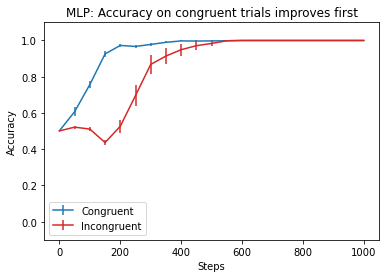

In [5]:
cong_accs, incong_accs = load_results(results_fn)
plot_accuracy(cong_accs, incong_accs, analyze_every, title, save_fn)

## RNN

In [6]:
results_fn = 'rnn.P'
analyze_every = 50
title = "RNN"
save_fn = '../../figures/rnn_cong_incong_acc.eps'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


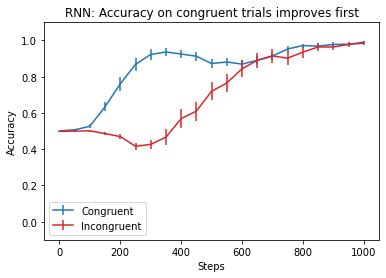

In [7]:
cong_accs, incong_accs = load_results(results_fn)
plot_accuracy(cong_accs, incong_accs, analyze_every, title, save_fn)